# Workflow dari Team BoAM Successor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clean_Aplikasi_Ecommerce(name):
    if "tiktok" in "".join(name.lower().split()):
        return "Tiktok Shop"
    return name

def clean_Waktu_Belanja_Online(waktu):
    if waktu == "Tanggal promo saja seperti (11.11, 12.12 dll)":
        return "Tanggal Promo"
    return waktu

def clean_Jenis_Barang(jenis_barang):
    return jenis_barang.replace("Kecantikan (makeup, skincare, dsb)", "Kecantikan")
    


##### Proses Pembersihan Data

In [3]:
variable_data = [
    'Nama', 'Umur', 'Tingkatan_Pendidikan', 'Jenis_kelamin',
    'Pengetahuan_Bisnis_Digital', 'Pengetahuan_ECommerce',
    'Keinginan_Buka_Usaha', 'Aplikasi_Ecommerce', 'Jenis_Barang',
    'Kelebihan_Belanja_Online','Waktu_Belanja_Online', 
    'Faktor_Tertarik_Belanja_Online',
]

In [4]:
data_kuisioner = pd.read_csv("./data/Kuisioner.csv")

data_kuisioner = data_kuisioner.loc[:, variable_data]
data_kuisioner["Nama"] = data_kuisioner.Nama.apply(lambda v: v.lower())
data_kuisioner.drop_duplicates(subset=["Nama"], inplace=True)
data_kuisioner["Aplikasi_Ecommerce"] = data_kuisioner["Aplikasi_Ecommerce"].apply(clean_Aplikasi_Ecommerce)
data_kuisioner["Waktu_Belanja_Online"] = data_kuisioner["Waktu_Belanja_Online"].apply(clean_Waktu_Belanja_Online)
data_kuisioner["Jenis_Barang"] = data_kuisioner["Jenis_Barang"].apply(clean_Jenis_Barang)

data_kuisioner.head()

,Nama,Umur,Tingkatan_Pendidikan,Jenis_kelamin,Pengetahuan_Bisnis_Digital,Pengetahuan_ECommerce,Keinginan_Buka_Usaha,Aplikasi_Ecommerce,Jenis_Barang,Kelebihan_Belanja_Online,Waktu_Belanja_Online,Faktor_Tertarik_Belanja_Online
0,fendi setiawan,17,SMA/SMK,Laki laki,1,5,5,Lazada,"Elektronik, Fashion, Makanan, Pakaian, Tiket",Efisien,Tanggal Promo,Gratis ongkir
1,malika faiza,15,SMA/SMK,Perempuan,2,1,3,Shopee,"Elektronik, Fashion, Pakaian, Sepatu, Buku, Ke...",Efisien,Pertengahan bulan,Gratis ongkir
2,fajrin amalia fauziah,16,SMA/SMK,Perempuan,3,4,4,Shopee,"Makanan, Pakaian, Kecantikan","Promo, Harga",Pertengahan bulan,Gratis ongkir
4,muhamad qosim,19,SMA/SMK,Laki laki,4,4,5,Shopee,"Elektronik, Fashion, Makanan","Promo, Harga",Awal bulan,Gratis ongkir
5,firyal alifah anshoriyah,17,SMA/SMK,Perempuan,1,1,5,Shopee,"Fashion, Makanan, Pakaian, Sepatu, Buku, Kecan...","Promo, Harga, Efisien",Tanggal Promo,sesuai kebutuhan dsn mencari diskon serta grat...


##### Informasi Data

In [5]:
data_kuisioner.columns

Index(['Nama', 'Umur', 'Tingkatan_Pendidikan', 'Jenis_kelamin',
       'Pengetahuan_Bisnis_Digital', 'Pengetahuan_ECommerce',
       'Keinginan_Buka_Usaha', 'Aplikasi_Ecommerce', 'Jenis_Barang',
       'Kelebihan_Belanja_Online', 'Waktu_Belanja_Online',
       'Faktor_Tertarik_Belanja_Online'],
      dtype='object')

## Informasi Dataset Secara General

##### Total Responden

In [6]:
print("Total Responden adalah: ", data_kuisioner.shape[0])

Total Responden adalah:  248


##### Persentase Gender Pengisi Data

In [7]:
gender_pengisi = data_kuisioner.Jenis_kelamin.value_counts()
gender_pengisi

Laki laki    140
Perempuan    108
Name: Jenis_kelamin, dtype: int64

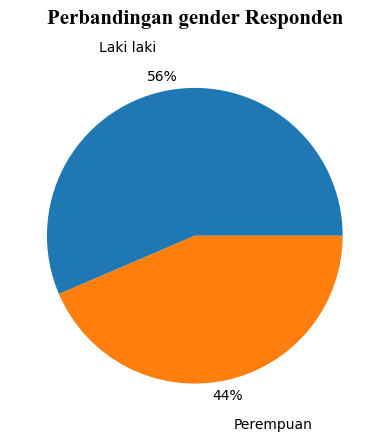

In [8]:
fig, ax = plt.subplots()
ax.pie(gender_pengisi, labels=gender_pengisi.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
ax.set_title('Perbandingan gender Responden', fontname="Times New Roman", size=15,fontweight="bold", pad=20)
plt.show()


##### Persentase Tingkatan Pendidikan Pengisi Kuisioner

In [9]:
pendidikan_pengisi = data_kuisioner.Tingkatan_Pendidikan.value_counts()
pendidikan_pengisi

SMA/SMK      241
Mahasiswa      7
Name: Tingkatan_Pendidikan, dtype: int64

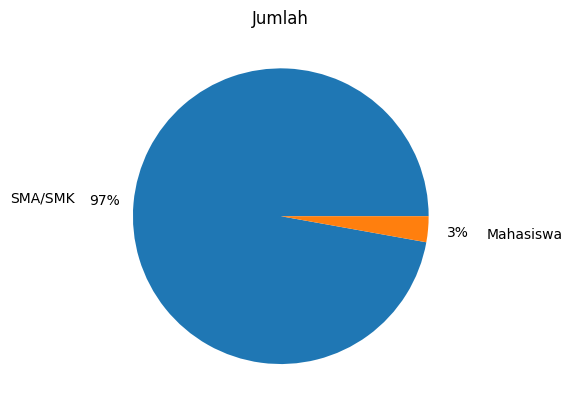

In [10]:
plt.title("Jumlah")
plt.pie(pendidikan_pengisi, labels=pendidikan_pengisi.index, autopct='%1.0f%%', pctdistance=1.2 , labeldistance=1.4)
plt.show()

##### Tingkat Umur Pengisi Kuisioner

In [11]:
ter_muda = data_kuisioner["Umur"].min()
ter_tua = data_kuisioner["Umur"].max()
rata_rata_umur = data_kuisioner["Umur"].mean()

print(f"""
Termuda  \t: {ter_muda}
Tertua   \t: {ter_tua}
rata-rata \t: {rata_rata_umur}
""")


Termuda  	: 14
Tertua   	: 24
rata-rata 	: 16.68951612903226



In [12]:
def createHorizontalBar(
    index, 
    values, 
    xlabel="Kuantitas", 
    ylabel="value", 
    title="Persebaran", 
    placing="upper right",
    isInverted=False
    ):

    y_pos = np.arange(len(index))
    fig, ax = plt.subplots(figsize=(15,6))

    hbars = ax.barh(
        y_pos, 
        values, 
        align="center", 
        color=['tab:red', 'tab:blue', 'tab:orange', 'tab:purple'],
        label=values
    )
    if(isInverted):
        ax.invert_xaxis()
    ax.bar_label(hbars, fmt='%.2f')
    ax.legend(index,loc=placing)
    ax.set_yticks(y_pos, index)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel, size=13)
    ax.set_ylabel(ylabel, size=13)
    ax.set_title(title, size=15,fontweight="bold", pad=20)

    plt.show()

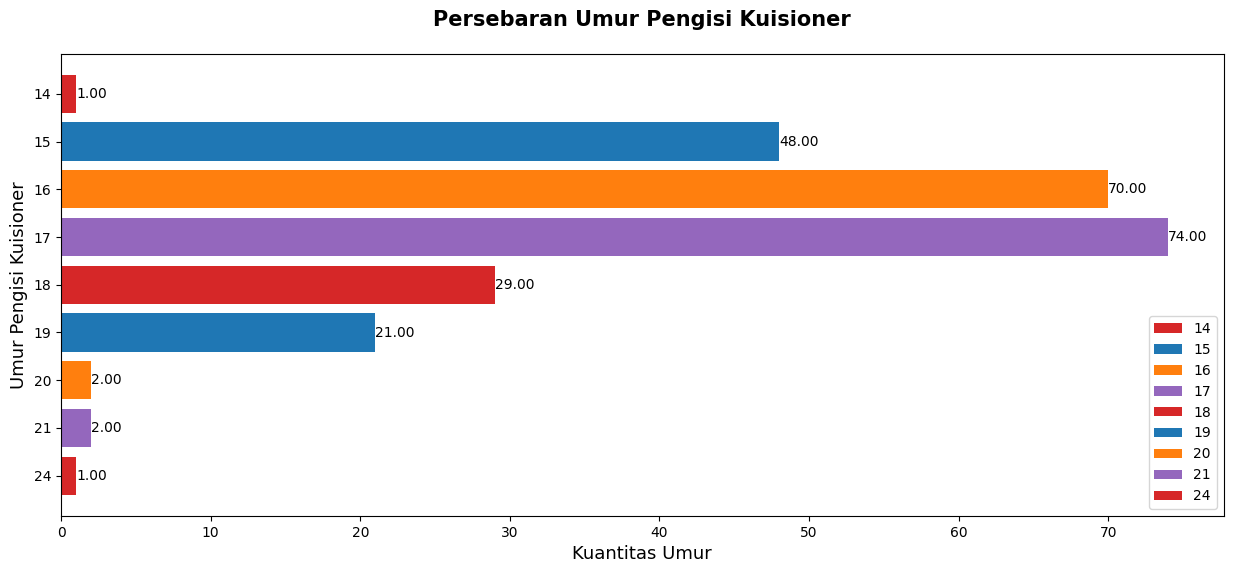

In [13]:
persebaran_umur = data_kuisioner["Umur"].value_counts().sort_index()
umur = persebaran_umur.index
banyak_umur = persebaran_umur.values

createHorizontalBar(
    umur, 
    banyak_umur, 
    xlabel="Kuantitas Umur", 
    ylabel="Umur Pengisi Kuisioner", 
    title="Persebaran Umur Pengisi Kuisioner",
    placing="lower right"
)


##### Pengetahuan Pengisi Kuisioner Terhadap Bisnis Digital (skala 1-5)

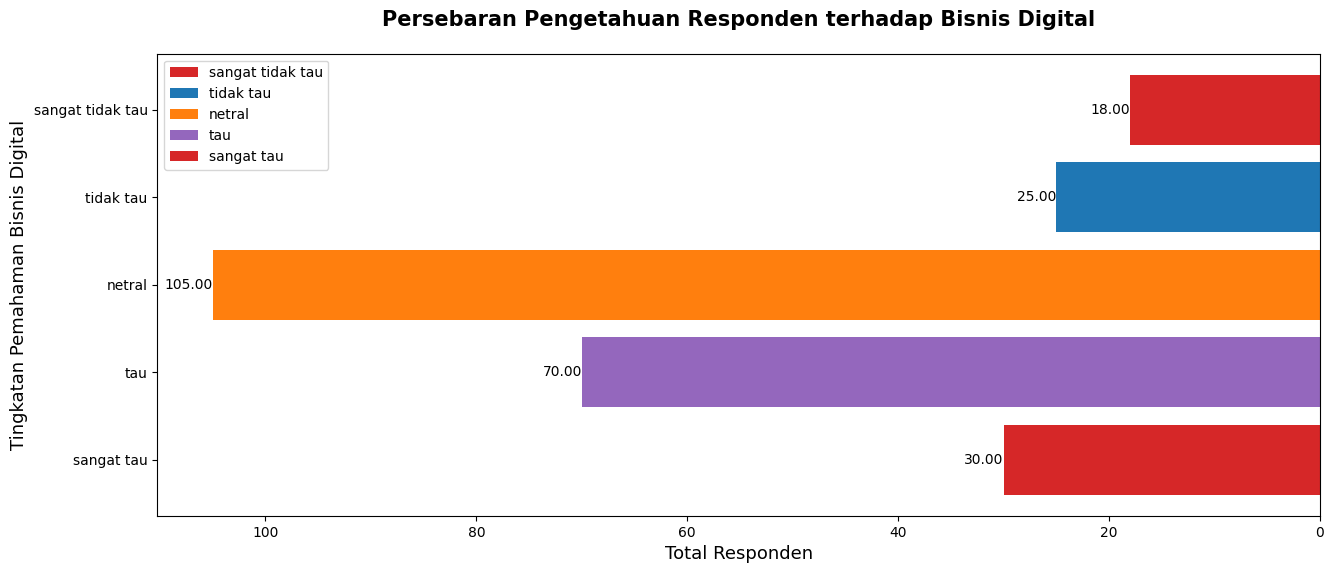

In [14]:
persebaran_pd = data_kuisioner["Pengetahuan_Bisnis_Digital"].value_counts().sort_index()
tingkatan_pd = persebaran_pd.index
jumlah_tingkatan_pd = persebaran_pd.values

createHorizontalBar(
    ["sangat tidak tau", "tidak tau", "netral", "tau", "sangat tau"], 
    jumlah_tingkatan_pd, 
    xlabel="Total Responden", 
    ylabel="Tingkatan Pemahaman Bisnis Digital", 
    title="Persebaran Pengetahuan Responden terhadap Bisnis Digital",
    isInverted=True,
    placing="upper left"
)


##### Persebaran Pengetahuan responden Terhadap E-Commerce

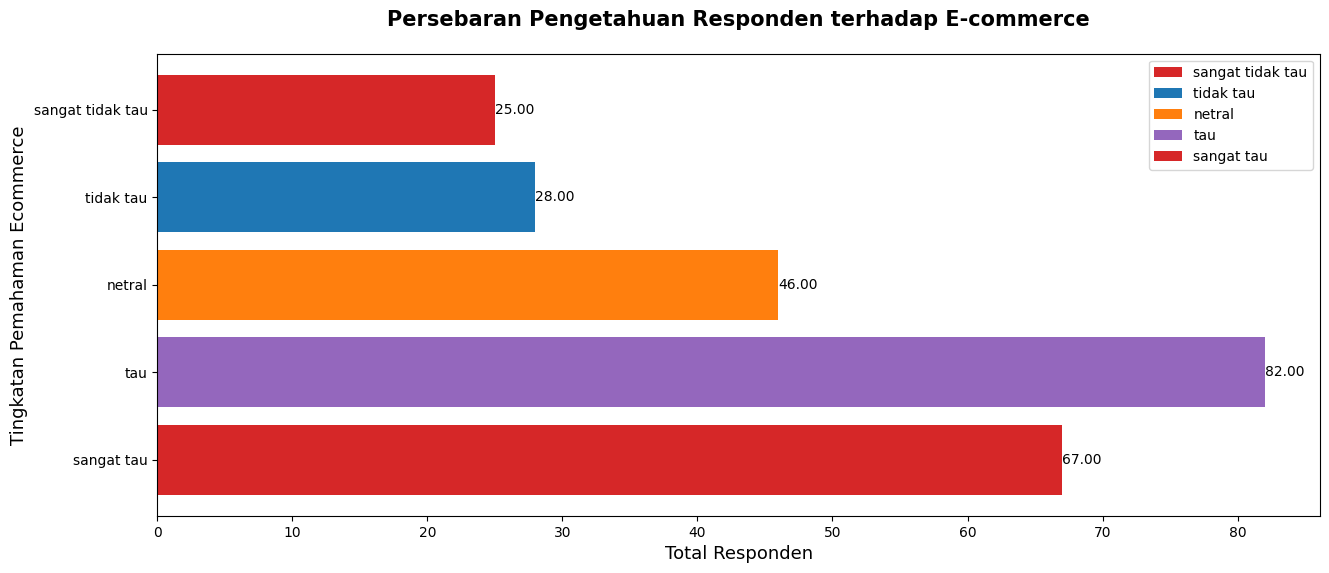

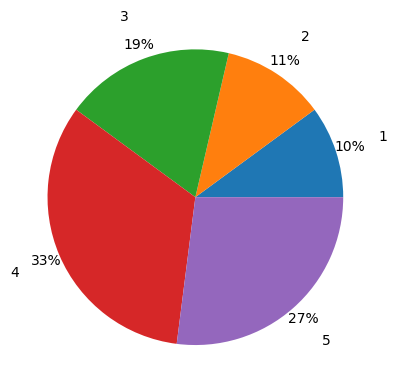

In [15]:
persebaran_pe = data_kuisioner["Pengetahuan_ECommerce"].value_counts().sort_index()
tingkatan_pe = persebaran_pe.index
jumlah_tingkatan_pe = persebaran_pe.values

createHorizontalBar(
    ["sangat tidak tau", "tidak tau", "netral", "tau", "sangat tau"], 
    jumlah_tingkatan_pe, 
    xlabel="Total Responden", 
    ylabel="Tingkatan Pemahaman Ecommerce", 
    title="Persebaran Pengetahuan Responden terhadap E-commerce"
)

plt.pie(persebaran_pe, labels=persebaran_pe.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Tingkat Keinginan Untuk Membuka Usaha

In [16]:
persebaran_bu = data_kuisioner["Keinginan_Buka_Usaha"].value_counts().sort_index()
tingkatan_bu = persebaran_bu.index
jumlah_tingkatan_bu = persebaran_bu.values

data_kuisioner["Keinginan_Buka_Usaha"].sum() / data_kuisioner["Keinginan_Buka_Usaha"].shape[0]
# createHorizontalBar(
#     tingkatan_bu, 
#     jumlah_tingkatan_bu, 
#     xlabel="Responden", 
#     ylabel="Tingkatan Keinginan", 
#     title="Persebaran Keinginan Responden Untuk Membuka Bisnis Digital"
# )

# plt.pie(persebaran_bu, labels=persebaran_bu.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
# plt.show()

3.842741935483871

##### Aplikasi Ecommerce yang digunakan

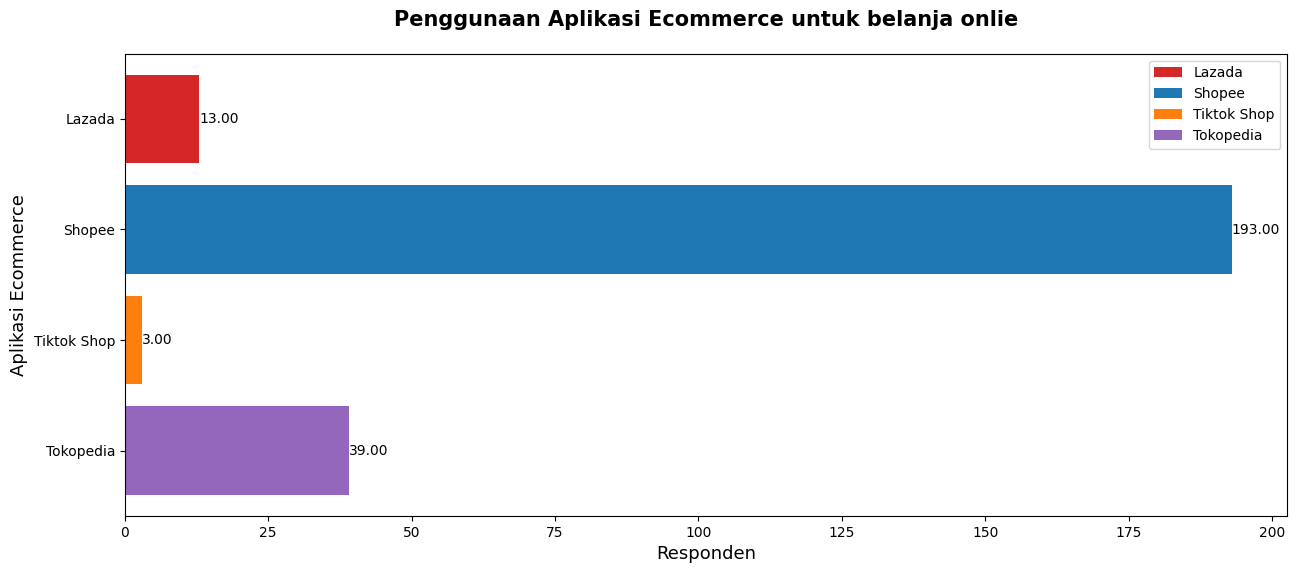

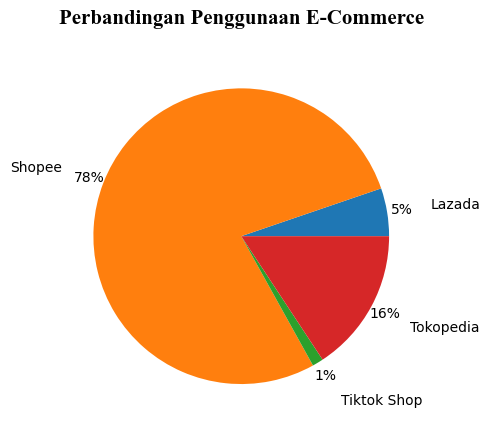

In [30]:

persebaran_aplikasi_eccommerce = data_kuisioner["Aplikasi_Ecommerce"].value_counts().sort_index()
tingkatan_aplikasi_eccommerce = persebaran_aplikasi_eccommerce.index
jumlah_tingkatan_aplikasi_eccommerce = persebaran_aplikasi_eccommerce.values

createHorizontalBar(
    tingkatan_aplikasi_eccommerce, 
    jumlah_tingkatan_aplikasi_eccommerce, 
    xlabel="Responden", 
    ylabel="Aplikasi Ecommerce", 
    title="Penggunaan Aplikasi Ecommerce untuk belanja onlie"
)

fig, ax = plt.subplots()
ax.pie(persebaran_aplikasi_eccommerce, labels=persebaran_aplikasi_eccommerce.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
ax.set_title('Perbandingan Penggunaan E-Commerce', fontname="Times New Roman", size=15,fontweight="bold", pad=20)
plt.show()

# plt.pie(persebaran_aplikasi_eccommerce, labels=persebaran_aplikasi_eccommerce.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
# plt.show()



#### Jenis Barang Yang biasa dibeli responden

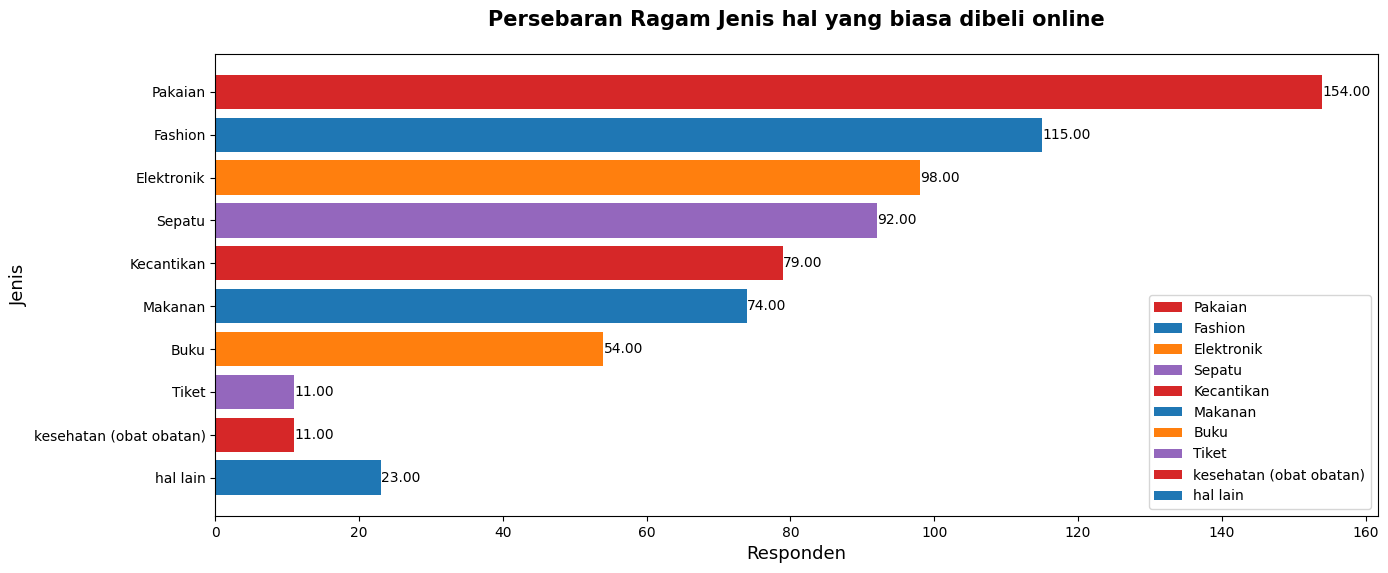

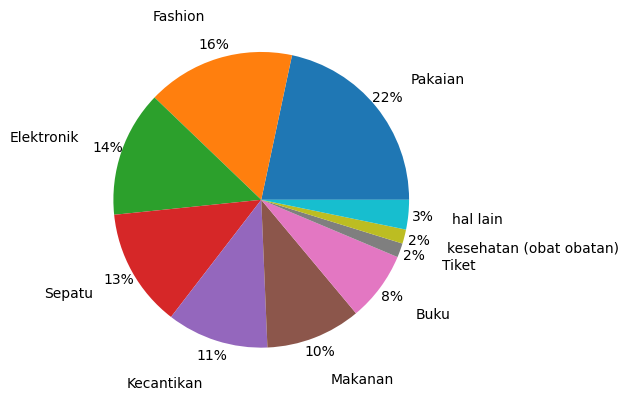

In [18]:
default_values = ["Elektronik", "Fashion", "Pakaian", "kesehatan (obat obatan)", "Tiket", "Buku", "Makanan", "Kecantikan", "Sepatu"]

jenis_barang = data_kuisioner.Jenis_Barang.apply(lambda x: x.split(", ")).explode().value_counts()

dataDefault = jenis_barang.loc[jenis_barang.index.isin(values=default_values)]
others = pd.Series({"hal lain" : jenis_barang.loc[~jenis_barang.index.isin(values=default_values)].sum()})

dataFinal = pd.concat([dataDefault, others])

createHorizontalBar(
    dataFinal.index, 
    dataFinal.values, 
    xlabel="Responden", 
    ylabel="Jenis", 
    title="Persebaran Ragam Jenis hal yang biasa dibeli online",
    placing="lower right"

)

plt.pie(dataFinal, labels=dataFinal.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()


##### Waktu Belanja yang biasa dilakukan responden

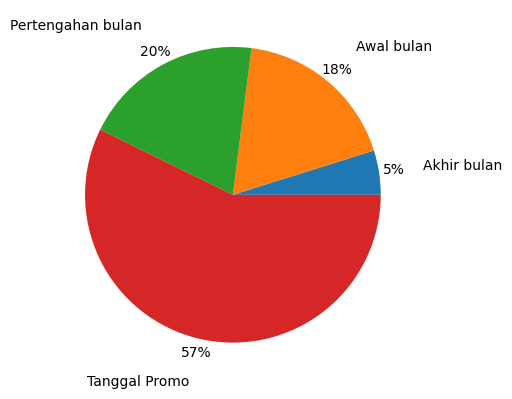

In [19]:

waktu_belanja_online = data_kuisioner.Waktu_Belanja_Online.value_counts().sort_index()

plt.pie(waktu_belanja_online, labels=waktu_belanja_online.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()


##### Faktor Responden Mau berbelanja Online

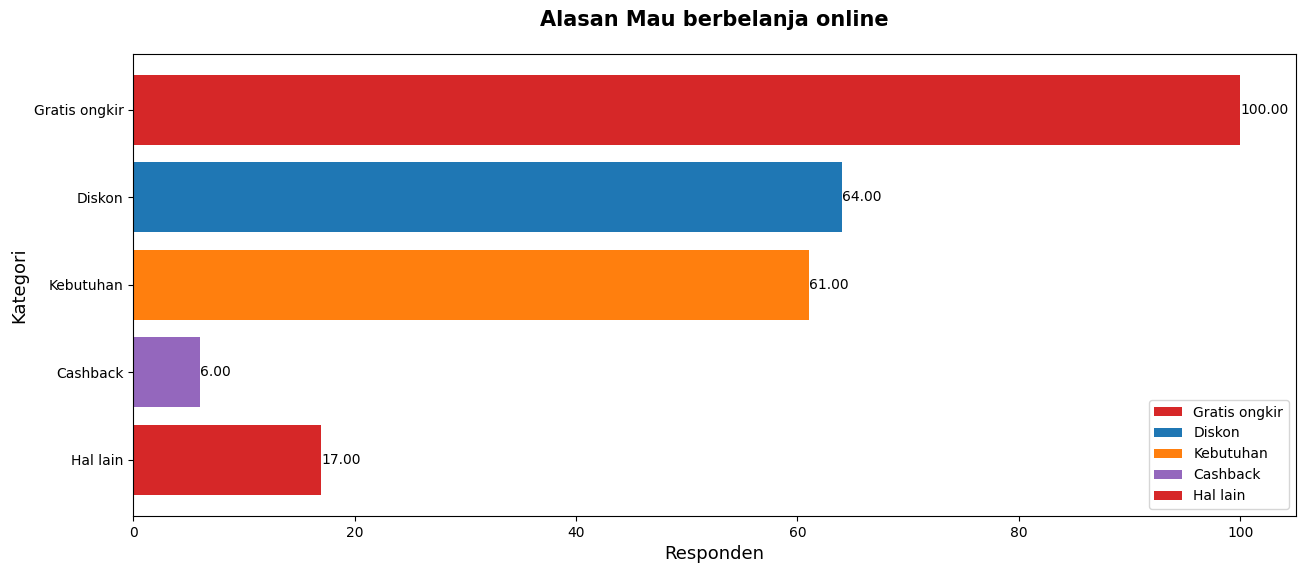

In [20]:
default_val = data_kuisioner.Faktor_Tertarik_Belanja_Online.value_counts().iloc[:4]
Hal_lain = pd.Series({"Hal lain" : data_kuisioner.Faktor_Tertarik_Belanja_Online.value_counts().iloc[4:].sum()})

alasan_belanja_online = pd.concat([default_val, Hal_lain])
index_abo = alasan_belanja_online.index
value_abo = alasan_belanja_online.values

createHorizontalBar(
    index_abo, 
    value_abo, 
    xlabel="Responden", 
    ylabel="Kategori", 
    title="Alasan Mau berbelanja online",
    placing="lower right"
)


## Sub-informasi Dataset

### Korelasi Data Perempuan

##### Umur Responded Perempuan

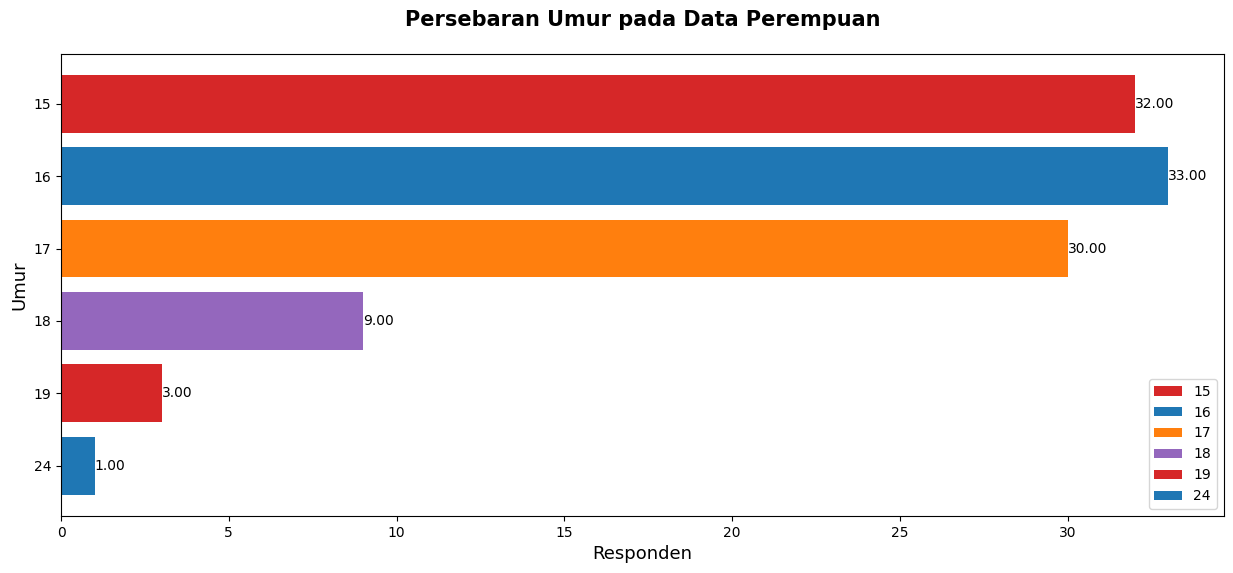

In [21]:
perempuan_umur = data_kuisioner[data_kuisioner["Jenis_kelamin"] == "Perempuan"]["Umur"].value_counts().sort_index()

createHorizontalBar(
    perempuan_umur.index, 
    perempuan_umur.values, 
    xlabel="Responden", 
    ylabel="Umur", 
    title="Persebaran Umur pada Data Perempuan",
    placing="lower right"
)

##### Persebaran Persetase Pengetahuan Bisnis Digital pada Perempuan

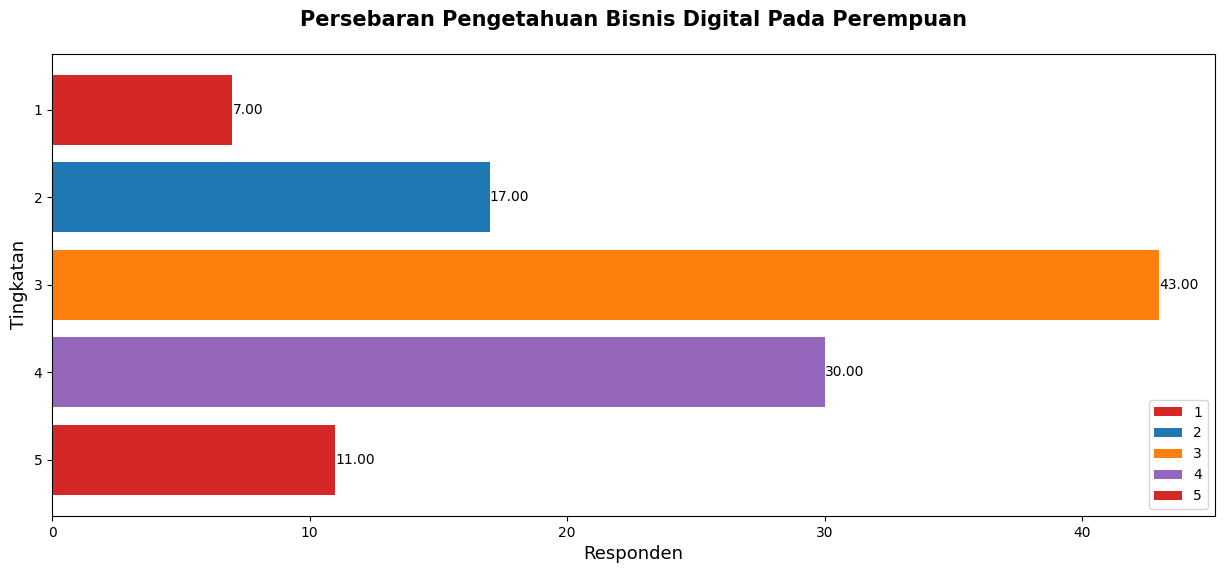

In [22]:
perempuan_pbd = data_kuisioner[data_kuisioner["Jenis_kelamin"] == "Perempuan"]["Pengetahuan_Bisnis_Digital"].value_counts().sort_index()

createHorizontalBar(
    perempuan_pbd.index, 
    perempuan_pbd.values, 
    xlabel="Responden", 
    ylabel="Tingkatan", 
    title="Persebaran Pengetahuan Bisnis Digital Pada Perempuan",
    placing="lower right"
)

##### Persebaran Terkait Pengetahuan Perempuan terhadap E-commerce

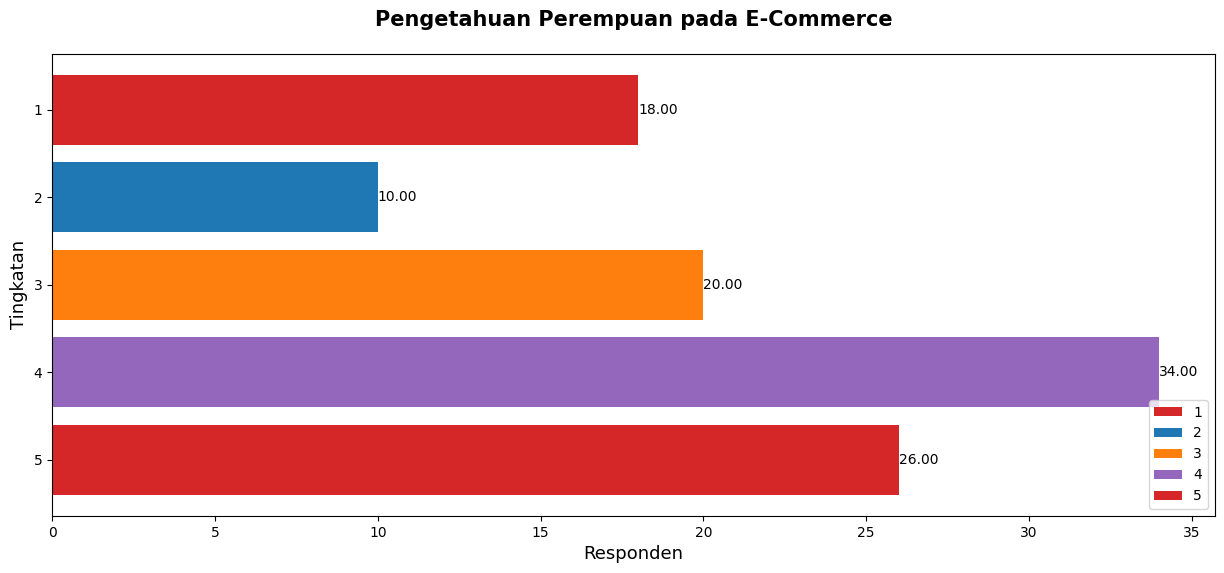

In [23]:
perempuan_pe = data_kuisioner[data_kuisioner["Jenis_kelamin"] == "Perempuan"]["Pengetahuan_ECommerce"].value_counts().sort_index()

createHorizontalBar(
    perempuan_pe.index, 
    perempuan_pe.values, 
    xlabel="Responden", 
    ylabel="Tingkatan", 
    title="Pengetahuan Perempuan pada E-Commerce",
    placing="lower right"
)

##### Persebaran Terkait Keinginan Perempuan untuk membuka Usaha

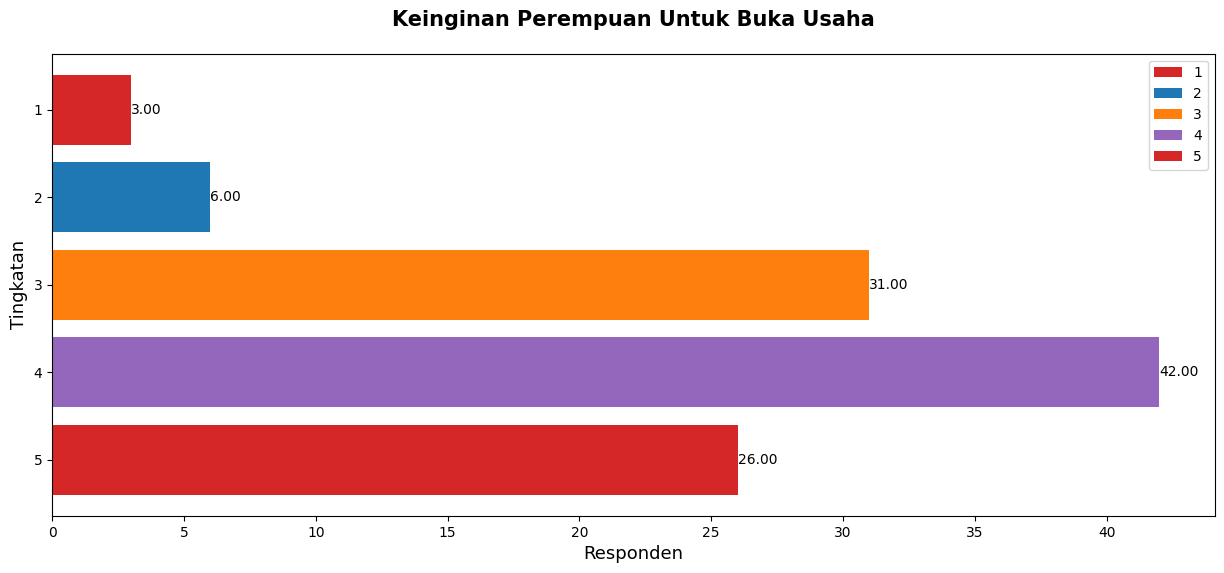

In [24]:
perempuan_mu = data_kuisioner[data_kuisioner["Jenis_kelamin"] == "Perempuan"]["Keinginan_Buka_Usaha"].value_counts().sort_index()

createHorizontalBar(
    perempuan_mu.index, 
    perempuan_mu.values, 
    xlabel="Responden", 
    ylabel="Tingkatan", 
    title="Keinginan Perempuan Untuk Buka Usaha"
)


##### Aplikasi E-Commerce yang sering dibuka oleh Perempuan

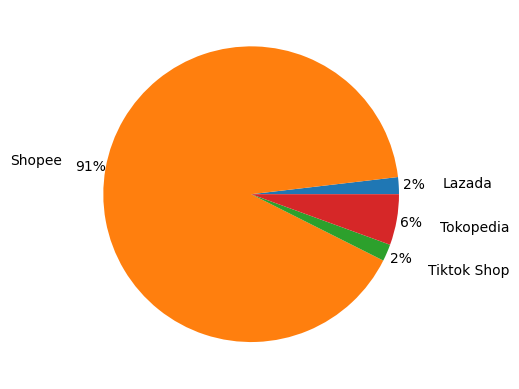

In [25]:
perempuan_eap = data_kuisioner[data_kuisioner["Jenis_kelamin"] == "Perempuan"]["Aplikasi_Ecommerce"].value_counts().sort_index()

plt.pie(perempuan_eap, labels=perempuan_eap.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Jenis barang yang Sering dibeli Perempuan

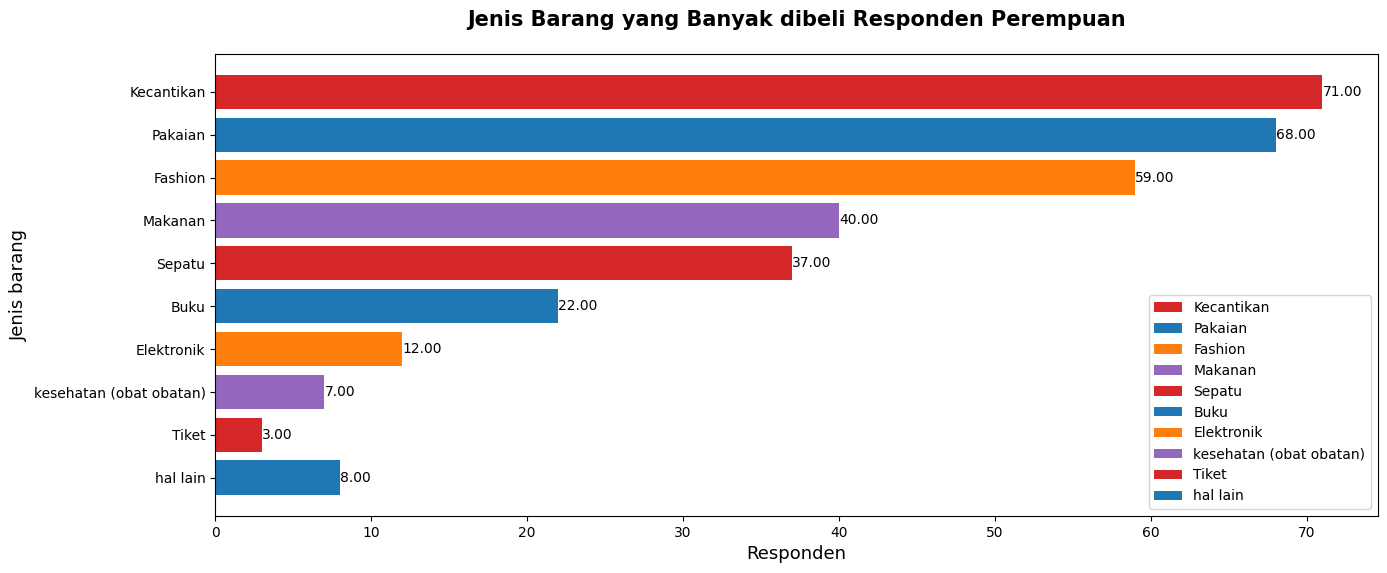

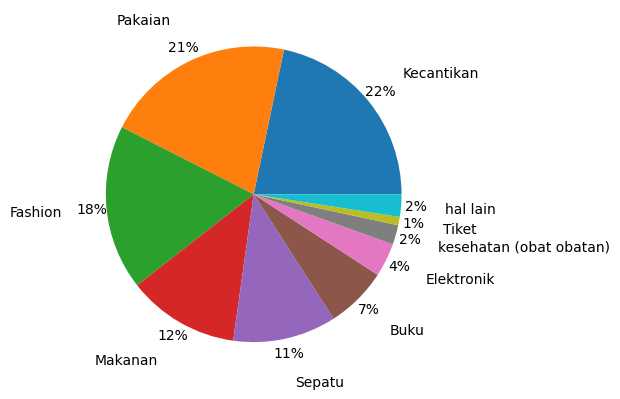

In [26]:
default_values = ["Elektronik", "Fashion", "Pakaian", "kesehatan (obat obatan)", "Tiket", "Buku", "Makanan", "Kecantikan", "Sepatu"]

jenis_barang = data_kuisioner[data_kuisioner.Jenis_kelamin == "Perempuan"].Jenis_Barang.apply(lambda x: x.split(", ")).explode().value_counts()

dataDefault = jenis_barang.loc[jenis_barang.index.isin(values=default_values)]
others = pd.Series({"hal lain" : jenis_barang.loc[~jenis_barang.index.isin(values=default_values)].sum()})

dataFinal = pd.concat([dataDefault, others])

createHorizontalBar(
    dataFinal.index, 
    dataFinal.values, 
    xlabel="Responden", 
    ylabel="Jenis barang", 
    title="Jenis Barang yang Banyak dibeli Responden Perempuan",
    placing="lower right"

)

plt.pie(dataFinal, labels=dataFinal.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Waktu Belanja yang biasa dilakukan responden Perempuan

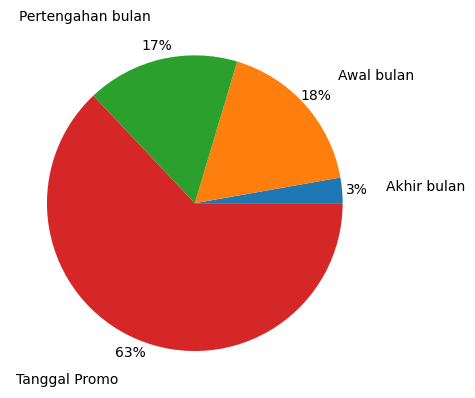

In [27]:
waktu_belanja_online = data_kuisioner[data_kuisioner.Jenis_kelamin == "Perempuan"].Waktu_Belanja_Online.value_counts().sort_index()

plt.pie(waktu_belanja_online, labels=waktu_belanja_online.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Faktor yang membuat Perempuan Suka Belanja

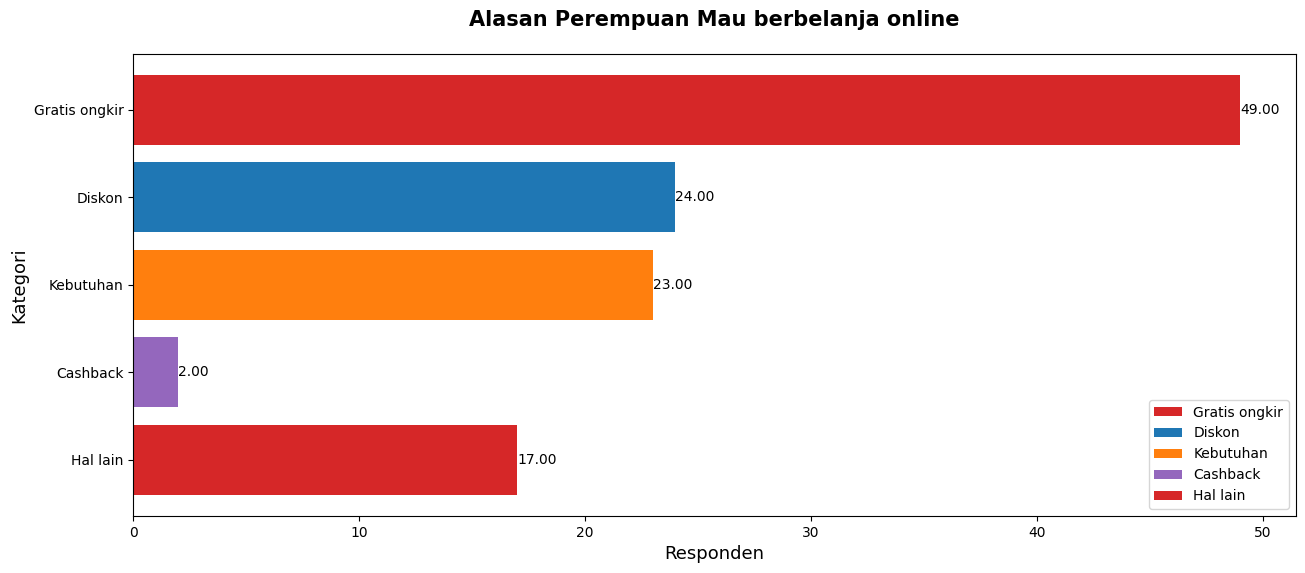

In [28]:
default_val = data_kuisioner[data_kuisioner.Jenis_kelamin == "Perempuan"].Faktor_Tertarik_Belanja_Online.value_counts().iloc[:4]
Hal_lain = pd.Series({"Hal lain" : data_kuisioner.Faktor_Tertarik_Belanja_Online.value_counts().iloc[4:].sum()})

alasan_belanja_online = pd.concat([default_val, Hal_lain])
index_abo = alasan_belanja_online.index
value_abo = alasan_belanja_online.values

createHorizontalBar(
    index_abo, 
    value_abo, 
    xlabel="Responden", 
    ylabel="Kategori", 
    title="Alasan Perempuan Mau berbelanja online",
    placing="lower right"
)